# Data visualization

All data have been extracted from bynance: https://www.binance.com/en/landing/data\


In [28]:
import pandas as pd
from datetime import datetime

header = ["Open time", "Open", "High", "Low",
           "Close/latest","Volume","Close time",
            "Base asset volume", "Number of trades", 
            "Taker by volume", "Taker by base asset volume", "Ignore" ]

usdT_df = pd.read_csv("BTCUSDT-5m-2024-05-26.csv", sep=",", names=header)

# Timestamps are in milliseconds so need to be divided by 1000
usdT_df["Open time"] = usdT_df["Open time"].apply(lambda x: datetime.fromtimestamp(int(x/1000)))

usdT_df.head(n=3)

,Open time,Open,High,Low,Close/latest,Volume,Close time,Base asset volume,Number of trades,Taker by volume,Taker by base asset volume,Ignore
0,2024-05-26 02:00:00,69290.56,69319.31,69244.80,69245.41,72.63003,1716681899999,5.031533e+06,2664,48.00693,3.325721e+06,0
1,2024-05-26 02:05:00,69245.41,69245.41,69234.57,69234.58,36.52589,1716682199999,2.529043e+06,1725,9.92213,6.869921e+05,0
2,2024-05-26 02:10:00,69234.58,69234.58,69232.34,69232.35,29.65504,1716682499999,2.053146e+06,1613,24.11369,1.669497e+06,0


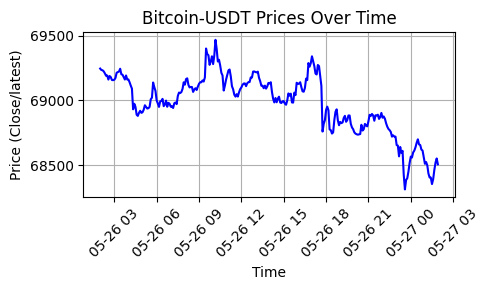

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(usdT_df["Open time"], usdT_df["Close/latest"], color='blue')
plt.xlabel('Time')
plt.ylabel('Price (Close/latest)')
plt.title('Bitcoin-USDT Prices Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:

header = ["Open time", "Open", "High", "Low",
           "Close/latest","Volume","Close time",
            "Base asset volume", "Number of trades", 
            "Taker by volume", "Taker by base asset volume", "Ignore" ]

usdC_df = pd.read_csv("BTCUSDC-5m-2024-05-26.csv", sep=",", names=header)

# Timestamps are in milliseconds so need to be divided by 1000
usdC_df["Open time"] = usdC_df["Open time"].apply(lambda x: datetime.fromtimestamp(int(x/1000)))
usdC_df.head(n=3)

,Open time,Open,High,Low,Close/latest,Volume,Close time,Base asset volume,Number of trades,Taker by volume,Taker by base asset volume,Ignore
0,2024-05-26 02:00:00,69287.99,69312.0,69237.69,69237.70,3.14051,1716681899999,217536.244991,209,1.26427,87573.558306,0
1,2024-05-26 02:05:00,69237.70,69237.7,69221.84,69221.84,0.54948,1716682199999,38039.448902,117,0.08102,5608.623582,0
2,2024-05-26 02:10:00,69221.84,69244.0,69221.84,69223.77,0.75211,1716682499999,52069.414840,134,0.39615,27425.502552,0


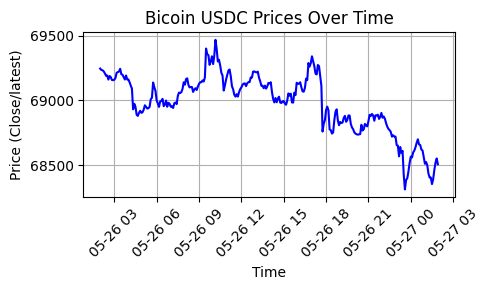

In [31]:

plt.figure(figsize=(5, 3))
plt.plot(usdT_df["Open time"], usdT_df["Close/latest"], color='blue')
plt.xlabel('Time')
plt.ylabel('Price (Close/latest)')
plt.title('Bicoin USDC Prices Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


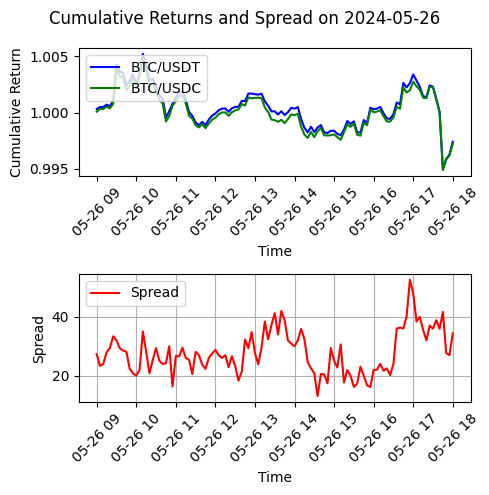

In [32]:
import matplotlib.pyplot as plt

# Specify the date
date = pd.Timestamp(2024, 5, 26)

# Define the time range for investment (from 9 am to 6 pm)
start_time = pd.Timestamp(date.year, date.month, date.day, 9, 0, 0)  # 9 am
end_time = pd.Timestamp(date.year, date.month, date.day, 18, 0, 0)    # 6 pm  

# Filter usdT and usdC data for the time range
usdT_day_data = usdT_df[(usdT_df["Open time"] >= start_time) & (usdT_df["Open time"] <= end_time)]
usdC_day_data = usdC_df[(usdC_df["Open time"] >= start_time) & (usdC_df["Open time"] <= end_time)]

# Calculate cumulative return for usdT and usdC
usdT_cumulative_return = (usdT_day_data["Close/latest"] / usdT_day_data["Open"]).cumprod()
usdC_cumulative_return = (usdC_day_data["Close/latest"] / usdC_day_data["Open"]).cumprod()

# Calculate the spread between usdT and usdC close prices
spread = usdT_day_data["Close/latest"] - usdC_day_data["Close/latest"]

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# Plot cumulative returns for usdT and usdC
ax1.plot(usdT_day_data["Open time"], usdT_cumulative_return, label="BTC/USDT", color="blue")
ax1.plot(usdC_day_data["Open time"], usdC_cumulative_return, label="BTC/USDC", color="green")
ax1.set_xlabel("Time")
ax1.set_ylabel("Cumulative Return")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")

# Plot the spread between usdT and usdC close prices
ax2.plot(usdT_day_data["Open time"], spread, label="Spread", color="red")
ax2.set_xlabel("Time")
ax2.set_ylabel("Spread")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc="upper left")

# Title and grid
plt.suptitle(f"Cumulative Returns and Spread on {date.strftime('%Y-%m-%d')}")
plt.grid(True)
plt.tight_layout()
plt.show()



### Let's sample another day

In [33]:
import pandas as pd
from datetime import datetime

header = ["Open time", "Open", "High", "Low",
           "Close/latest","Volume","Close time",
            "Base asset volume", "Number of trades", 
            "Taker by volume", "Taker by base asset volume", "Ignore" ]

usdT_df = pd.read_csv("BTCUSDT-5m-2024-04-21.csv", sep=",", names=header)

# Timestamps are in milliseconds so need to be divided by 1000
usdT_df["Open time"] = usdT_df["Open time"].apply(lambda x: datetime.fromtimestamp(int(x/1000)))

usdT_df.head(n=3)

,Open time,Open,High,Low,Close/latest,Volume,Close time,Base asset volume,Number of trades,Taker by volume,Taker by base asset volume,Ignore
0,2024-04-21 02:00:00,64940.58,64960.00,64739.00,64862.01,135.79624,1713657899999,8.801392e+06,7490,60.33462,3.909933e+06,0
1,2024-04-21 02:05:00,64862.00,64884.47,64764.08,64818.78,57.05475,1713658199999,3.698641e+06,4746,32.07859,2.079428e+06,0
2,2024-04-21 02:10:00,64818.78,64872.01,64802.00,64872.00,36.30929,1713658499999,2.354147e+06,2989,20.91341,1.355899e+06,0


In [34]:

header = ["Open time", "Open", "High", "Low",
           "Close/latest","Volume","Close time",
            "Base asset volume", "Number of trades", 
            "Taker by volume", "Taker by base asset volume", "Ignore" ]

usdC_df = pd.read_csv("BTCUSDC-5m-2024-04-21.csv", sep=",", names=header)

# Timestamps are in milliseconds so need to be divided by 1000
usdC_df["Open time"] = usdC_df["Open time"].apply(lambda x: datetime.fromtimestamp(int(x/1000)))
usdC_df.head(n=3)

,Open time,Open,High,Low,Close/latest,Volume,Close time,Base asset volume,Number of trades,Taker by volume,Taker by base asset volume,Ignore
0,2024-04-21 02:00:00,64962.01,64982.02,64764.01,64884.05,4.33206,1713657899999,281092.461904,304,2.57547,167132.617149,0
1,2024-04-21 02:05:00,64888.01,64916.00,64784.01,64845.95,1.08276,1713658199999,70206.827203,99,0.65189,42263.377572,0
2,2024-04-21 02:10:00,64852.00,64890.00,64831.62,64886.00,0.47184,1713658499999,30609.716273,64,0.26922,17465.192585,0


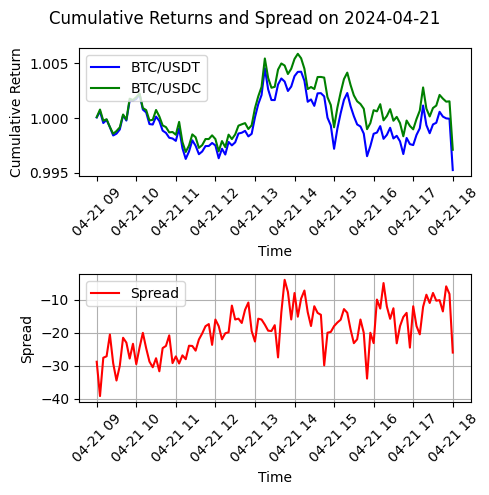

In [35]:
import matplotlib.pyplot as plt

# Specify the date
date = pd.Timestamp(2024, 4, 21)

# Define the time range for investment (from 9 am to 6 pm)
start_time = pd.Timestamp(date.year, date.month, date.day, 9, 0, 0)  # 9 am
end_time = pd.Timestamp(date.year, date.month, date.day, 18, 0, 0)    # 6 pm  

# Filter usdT and usdC data for the time range
usdT_day_data = usdT_df[(usdT_df["Open time"] >= start_time) & (usdT_df["Open time"] <= end_time)]
usdC_day_data = usdC_df[(usdC_df["Open time"] >= start_time) & (usdC_df["Open time"] <= end_time)]

# Calculate cumulative return for usdT and usdC
usdT_cumulative_return = (usdT_day_data["Close/latest"] / usdT_day_data["Open"]).cumprod()
usdC_cumulative_return = (usdC_day_data["Close/latest"] / usdC_day_data["Open"]).cumprod()

# Calculate the spread between usdT and usdC close prices
spread = usdT_day_data["Close/latest"] - usdC_day_data["Close/latest"]

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# Plot cumulative returns for usdT and usdC
ax1.plot(usdT_day_data["Open time"], usdT_cumulative_return, label="BTC/USDT", color="blue")
ax1.plot(usdC_day_data["Open time"], usdC_cumulative_return, label="BTC/USDC", color="green")
ax1.set_xlabel("Time")
ax1.set_ylabel("Cumulative Return")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")

# Plot the spread between usdT and usdC close prices
ax2.plot(usdT_day_data["Open time"], spread, label="Spread", color="red")
ax2.set_xlabel("Time")
ax2.set_ylabel("Spread")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc="upper left")

# Title and grid
plt.suptitle(f"Cumulative Returns and Spread on {date.strftime('%Y-%m-%d')}")
plt.grid(True)
plt.tight_layout()
plt.show()



### Last try

In [36]:
import pandas as pd
from datetime import datetime

header = ["Open time", "Open", "High", "Low",
           "Close/latest","Volume","Close time",
            "Base asset volume", "Number of trades", 
            "Taker by volume", "Taker by base asset volume", "Ignore" ]

usdT_df = pd.read_csv("BTCUSDT-5m-2024-03-10.csv", sep=",", names=header)

# Timestamps are in milliseconds so need to be divided by 1000
usdT_df["Open time"] = usdT_df["Open time"].apply(lambda x: datetime.fromtimestamp(int(x/1000)))

usdT_df.head(n=3)

,Open time,Open,High,Low,Close/latest,Volume,Close time,Base asset volume,Number of trades,Taker by volume,Taker by base asset volume,Ignore
0,2024-03-10 01:00:00,68313.28,68358.00,68313.27,68323.82,62.02636,1710029099999,4.238600e+06,6319,25.99579,1.776346e+06,0
1,2024-03-10 01:05:00,68323.82,68333.35,68286.97,68312.91,78.61938,1710029399999,5.370708e+06,7365,26.94678,1.840746e+06,0
2,2024-03-10 01:10:00,68312.91,68325.16,68261.10,68272.97,113.69641,1710029699999,7.765341e+06,5738,44.64100,3.048753e+06,0


In [37]:

header = ["Open time", "Open", "High", "Low",
           "Close/latest","Volume","Close time",
            "Base asset volume", "Number of trades", 
            "Taker by volume", "Taker by base asset volume", "Ignore" ]

usdC_df = pd.read_csv("BTCUSDC-5m-2024-03-10.csv", sep=",", names=header)

# Timestamps are in milliseconds so need to be divided by 1000
usdC_df["Open time"] = usdC_df["Open time"].apply(lambda x: datetime.fromtimestamp(int(x/1000)))
usdC_df.head(n=3)

,Open time,Open,High,Low,Close/latest,Volume,Close time,Base asset volume,Number of trades,Taker by volume,Taker by base asset volume,Ignore
0,2024-03-10 01:00:00,68458.71,68508.76,68458.71,68475.03,2.86725,1710029099999,196342.605440,232,1.83765,125837.776357,0
1,2024-03-10 01:05:00,68475.03,68486.42,68432.00,68460.42,1.77477,1710029399999,121492.176088,201,0.37448,25634.744495,0
2,2024-03-10 01:10:00,68461.42,68476.00,68412.00,68417.59,1.99837,1710029699999,136756.151361,135,1.66985,114268.884108,0


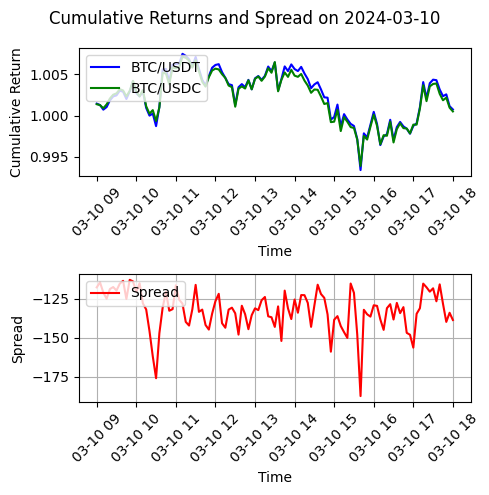

In [38]:
import matplotlib.pyplot as plt

# Specify the date
date = pd.Timestamp(2024, 3, 10)

# Define the time range for investment (from 9 am to 6 pm)
start_time = pd.Timestamp(date.year, date.month, date.day, 9, 0, 0)  # 9 am
end_time = pd.Timestamp(date.year, date.month, date.day, 18, 0, 0)    # 6 pm  

# Filter usdT and usdC data for the time range
usdT_day_data = usdT_df[(usdT_df["Open time"] >= start_time) & (usdT_df["Open time"] <= end_time)]
usdC_day_data = usdC_df[(usdC_df["Open time"] >= start_time) & (usdC_df["Open time"] <= end_time)]

# Calculate cumulative return for usdT and usdC
usdT_cumulative_return = (usdT_day_data["Close/latest"] / usdT_day_data["Open"]).cumprod()
usdC_cumulative_return = (usdC_day_data["Close/latest"] / usdC_day_data["Open"]).cumprod()

# Calculate the spread between usdT and usdC close prices
spread = usdT_day_data["Close/latest"] - usdC_day_data["Close/latest"]

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# Plot cumulative returns for usdT and usdC
ax1.plot(usdT_day_data["Open time"], usdT_cumulative_return, label="BTC/USDT", color="blue")
ax1.plot(usdC_day_data["Open time"], usdC_cumulative_return, label="BTC/USDC", color="green")
ax1.set_xlabel("Time")
ax1.set_ylabel("Cumulative Return")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")

# Plot the spread between usdT and usdC close prices
ax2.plot(usdT_day_data["Open time"], spread, label="Spread", color="red")
ax2.set_xlabel("Time")
ax2.set_ylabel("Spread")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc="upper left")

# Title and grid
plt.suptitle(f"Cumulative Returns and Spread on {date.strftime('%Y-%m-%d')}")
plt.grid(True)
plt.tight_layout()
plt.show()